# Bank Churn Model 

## import libraries 

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import data

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

In [102]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [104]:
df.duplicated('CustomerId').sum()

0

In [105]:
df = df.set_index('CustomerId')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [107]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [108]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}}, inplace = True)

In [109]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [110]:
df.replace({'Gender': {'Male':0,'Female':1}}, inplace=True)

In [111]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [112]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace = True)

In [113]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [114]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [115]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [116]:
df['Zero Balamce ']=np.where(df['Balance']>0,1,0)

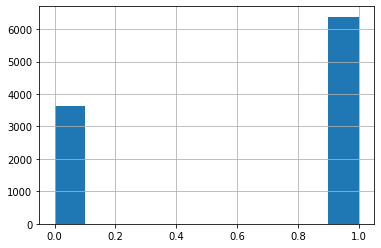

In [117]:
df['Zero Balamce '].hist()

In [118]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balamce   
Churn Geography                                   
0     0                      2064           2064  
      1                      1695           1695  
      2                      4204           4204  
1     0                       413            413  
      1                       814            814  
      2                       810            810

## define lable and features

In [119]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balamce '],
      dtype='object')

In [120]:
x = df.drop(['Surname','Churn'],axis = 1)

In [121]:
y = df['Churn']

In [122]:
x.shape,y.shape

((10000, 11), (10000,))

##handelling imbalance data

In [123]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


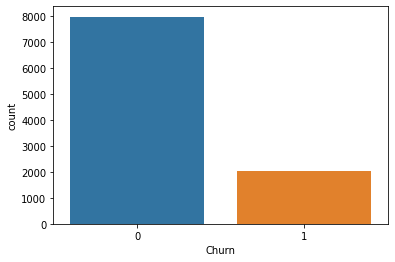

In [124]:
sns.countplot('Churn',data = df)

In [125]:
x.shape,y.shape

((10000, 11), (10000,))

## Random Under Sampling

In [126]:
from imblearn.under_sampling import RandomUnderSampler

In [127]:
rus = RandomUnderSampler(random_state=222529)

In [128]:
x_rus,y_rus = rus.fit_resample(x,y)

In [129]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [130]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [131]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

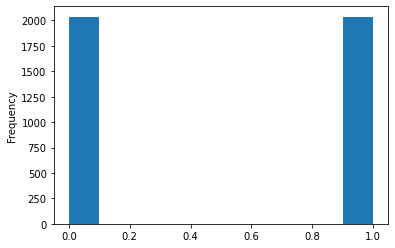

In [132]:
y_rus.plot(kind='hist')

## Random Over Sampling

In [133]:
from imblearn.over_sampling import RandomOverSampler

In [134]:
ros = RandomOverSampler(random_state = 222529)

In [135]:
x_ros , y_ros = ros.fit_resample(x,y)

In [136]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [137]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [138]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

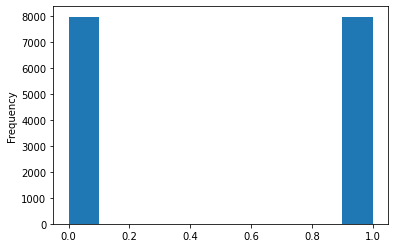

In [139]:
y_ros.plot(kind = 'hist')

## train test split

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=222529)

In [142]:
x_train_rus, x_test_rus, y_train_rus,y_test_rus=train_test_split(x_rus,y_rus, test_size=0.3,random_state=222529)

In [143]:
x_train_ros, x_test_ros, y_train_ros,y_test_ros=train_test_split(x_rus,y_rus, test_size=0.3,random_state=222529)

In [144]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [145]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [146]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [147]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [148]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [149]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [150]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [151]:
from sklearn.svm import SVC

In [152]:
svc=SVC()

In [153]:
svc.fit(x_train, y_train)

SVC()

In [154]:
y_pred=svc.predict(x_test)

In [155]:
from sklearn.metrics import confusion_matrix, classification_report

In [156]:
confusion_matrix(y_test, y_pred)

array([[2355,   54],
       [ 422,  169]])

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2409
           1       0.76      0.29      0.42       591

    accuracy                           0.84      3000
   macro avg       0.80      0.63      0.66      3000
weighted avg       0.83      0.84      0.81      3000



In [158]:
svc_rus=SVC()

In [159]:
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [160]:
y_pred_rus=svc_rus.predict(x_test_rus)

In [161]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[454, 159],
       [185, 425]])

In [162]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       613
           1       0.73      0.70      0.71       610

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [163]:
svc_ros=SVC()

In [164]:
svc_ros.fit(x_train_ros, y_train_ros)

SVC()

In [165]:
y_pred_ros=svc_ros.predict(x_test_ros)

In [166]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[454, 159],
       [185, 425]])

In [167]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       613
           1       0.73      0.70      0.71       610

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223

